## Information

- The dataset (data_copy) was collected from the following source: https://github.com/guilhermedom/cnn-fashion-mnist

- Parts of the code have been adapted from that repository.

- Any code generated with the help of AI tools is explicitly marked within the code.

- Some code snippets are also reused or adapted from assignments in the Deep Learning course, which is noted accordingly in the code.

- TODO: Calibrate the model , I don´t know how 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix, classification_report

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [3]:
fashion_train_df = pd.read_csv('data_copy/raw/fashion-mnist-train.csv')
fashion_test_df = pd.read_csv('data_copy/raw/fashion-mnist-test.csv')

In [4]:
print(fashion_train_df.shape)
display(fashion_train_df)

print(fashion_test_df.shape)
display(fashion_test_df)

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
import torch.nn as nn
import torch.nn.functional as F
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1)
        self.pool_1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
        self.pool_2 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)

        self.fc = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool_1(x)

        x = F.relu(self.conv2(x))
        x = self.pool_2(x)

        x = F.relu(self.conv3(x))

        x = x.view(x.size(0), -1)  # flatten
        x = self.fc(x)
        return x
    
model = CNN()


In [11]:
pip install torchinfo


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from torchinfo import summary

model = CNN()
summary(model, input_size=(64, 1, 28, 28))


ModuleNotFoundError: No module named 'torchinfo'

In [8]:
import numpy as np

X_full = fashion_train_df.drop("label", axis=1).values
y_full = fashion_train_df["label"].values

# Same seed 
np.random.seed(0)
N = len(fashion_train_df)
indices = np.random.permutation(N)

n_train = int(0.50 * N)   # 50%
n_val   = int(0.10 * N)   # 10%
# Remaining is combined set (40%)
n_comb  = N - (n_train + n_val)

# Index splits
idx_train = indices[:n_train]
idx_val   = indices[n_train:n_train + n_val]
idx_comb  = indices[n_train + n_val:] 

X_train = X_full[idx_train]
y_train = y_full[idx_train]

X_val = X_full[idx_val]
y_val = y_full[idx_val]

X_comb = X_full[idx_comb]
y_comb = y_full[idx_comb]

# Test set
X_test = fashion_test_df.drop("label", axis=1).values
y_test = fashion_test_df["label"].values

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Combined:", X_comb.shape, y_comb.shape)
print("Test:", X_test.shape, y_test.shape)

train_df = fashion_train_df.iloc[idx_train]
val_df   = fashion_train_df.iloc[idx_val]
comb_df  = fashion_train_df.iloc[idx_comb]

print("train frame:", len(train_df))
print("validation frame:", len(val_df))
print("combination frame:", len(comb_df))
print("test frame:", len(fashion_test_df))


Train: (30000, 784) (30000,)
Validation: (6000, 784) (6000,)
Combined: (24000, 784) (24000,)
Test: (10000, 784) (10000,)
train frame: 30000
validation frame: 6000
combination frame: 24000
test frame: 10000


In [34]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# Some part of this section is taken from Deep learning course assigment

# Split the combined split into train/test (80/20)
X_comb_train, X_comb_test, y_comb_train, y_comb_test = train_test_split(
    X_comb, y_comb, test_size=0.20, stratify=y_comb, random_state=0)

# Convert NumPy arrays → PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

X_comb_train_tensor = torch.tensor(X_comb_train, dtype=torch.float32)
y_comb_train_tensor = torch.tensor(y_comb_train, dtype=torch.long)

X_comb_test_tensor  = torch.tensor(X_comb_test,  dtype=torch.float32)
y_comb_test_tensor  = torch.tensor(y_comb_test,  dtype=torch.long)

# Wrap in TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
comb_train_dataset = TensorDataset(X_comb_train_tensor, y_comb_train_tensor)
comb_test_dataset  = TensorDataset(X_comb_test_tensor,  y_comb_test_tensor)

# DataLoaders
batch_size = X_train.shape[0] // 20
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)
comb_train_loader = DataLoader(comb_train_dataset, batch_size, shuffle=True)
comb_test_loader  = DataLoader(comb_test_dataset,  batch_size, shuffle=False)
# # check
# images, labels = next(iter(train_loader))
# print("Batch:", images.shape, labels.shape)   # expected value. (64, 784), (64,)


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
# This function is taken from deeplearning course assigment
def train_model(model, train_loader, val_loader, epochs=100, learning_rate=1e-3, patience=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    # optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-2)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)


    train_losses, train_accs = [], []
    val_losses, val_accs = [], []

    best_val_loss = float("inf")
    patience_counter = 0
    best_model_state = None

    start = time.perf_counter()

    for epoch in range(epochs):
        # ---- Training ----
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs = inputs.view(-1, 1, 28, 28)  # reshape
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_losses.append(running_loss / len(train_loader))
        train_accs.append(100 * correct / total)

        # ---- Validation ----
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.view(-1, 1, 28, 28)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        val_losses.append(val_loss / len(val_loader))
        val_accs.append(100 * correct / total)

        # ---- Early Stopping ---- 
        # This section is added by AI and is used in cases where we decide to try higher epoc number
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            patience_counter = 0
            best_model_state = model.state_dict()  # save best model
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                model.load_state_dict(best_model_state)  # restore best model
                break

        print(f"Epoch {epoch+1}/{epochs}: "
              f"Train Loss={train_losses[-1]:.4f}, Train Acc={train_accs[-1]:.2f}%, "
              f"Val Loss={val_losses[-1]:.4f}, Val Acc={val_accs[-1]:.2f}%")

    training_time = time.perf_counter() - start
    return train_losses, train_accs, val_losses, val_accs, training_time


In [36]:
train_losses, train_accs, val_losses, val_accs, training_time = train_model(
    model, train_loader, val_loader,
    epochs=100,         
    learning_rate=1e-3,  # safe for Adam
    patience=10
)


Epoch 1/100: Train Loss=0.3131, Train Acc=89.19%, Val Loss=0.3434, Val Acc=88.93%
Epoch 2/100: Train Loss=0.1973, Train Acc=92.73%, Val Loss=0.3370, Val Acc=89.25%
Epoch 3/100: Train Loss=0.1740, Train Acc=93.72%, Val Loss=0.3373, Val Acc=89.30%
Epoch 4/100: Train Loss=0.1684, Train Acc=93.83%, Val Loss=0.3311, Val Acc=89.72%
Epoch 5/100: Train Loss=0.1597, Train Acc=94.34%, Val Loss=0.3345, Val Acc=89.38%
Epoch 6/100: Train Loss=0.1571, Train Acc=94.34%, Val Loss=0.3406, Val Acc=89.25%
Epoch 7/100: Train Loss=0.1528, Train Acc=94.57%, Val Loss=0.3404, Val Acc=89.22%
Epoch 8/100: Train Loss=0.1446, Train Acc=94.97%, Val Loss=0.3390, Val Acc=89.45%
Epoch 9/100: Train Loss=0.1438, Train Acc=95.03%, Val Loss=0.3448, Val Acc=89.20%
Epoch 10/100: Train Loss=0.1441, Train Acc=94.82%, Val Loss=0.3635, Val Acc=89.03%
Epoch 11/100: Train Loss=0.1398, Train Acc=94.91%, Val Loss=0.3605, Val Acc=88.98%
Epoch 12/100: Train Loss=0.1310, Train Acc=95.37%, Val Loss=0.3527, Val Acc=89.38%
Epoch 13/100:

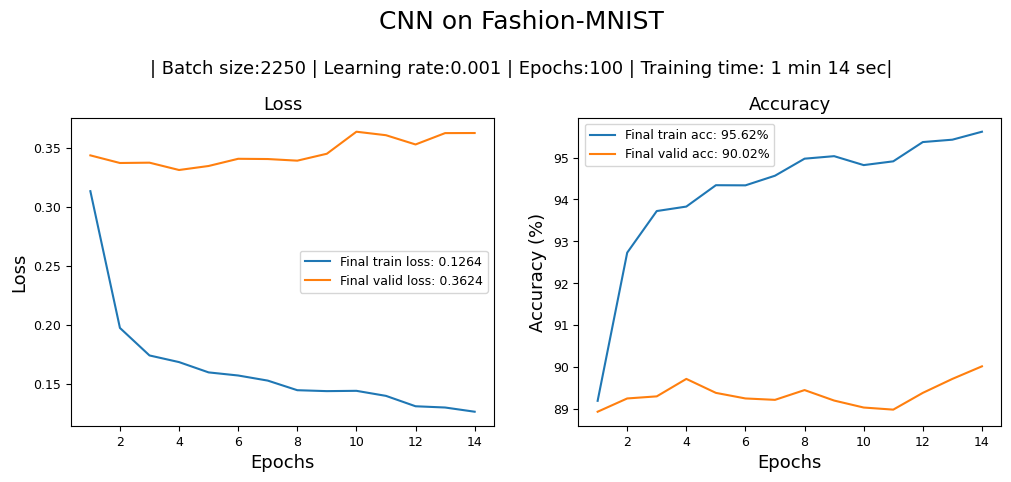

In [37]:
from matplotlib import pyplot as plt
import numpy as np

def training_curve_plot(title, train_costs, valid_costs, train_accuracies, valid_accuracies, batch_size, learning_rate, training_time, epochs):
    lg=18
    md=13
    sm=9
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(title, y=1.15, fontsize=lg)
    
    mins, secs = divmod(training_time, 60)
    sub = f'| Batch size:{batch_size} | Learning rate:{learning_rate} | Epochs:{epochs} | Training time: {int(mins)} min {secs:.0f} sec|'
    fig.text(0.5, 0.99, sub, ha='center', fontsize=md)
    
    x = range(1, len(train_costs)+1)

    # ---- Loss plot ----
    axs[0].plot(x, train_costs, label=f'Final train loss: {train_costs[-1]:.4f}')
    axs[0].plot(x, valid_costs, label=f'Final valid loss: {valid_costs[-1]:.4f}')
    axs[0].set_title('Loss', fontsize=md)
    axs[0].set_xlabel('Epochs', fontsize=md)
    axs[0].set_ylabel('Loss', fontsize=md)
    axs[0].legend(fontsize=sm)
    axs[0].tick_params(axis='both', labelsize=sm)

    # ---- Accuracy plot ----
    axs[1].plot(x, train_accuracies, label=f'Final train acc: {train_accuracies[-1]:.2f}%')
    axs[1].plot(x, valid_accuracies, label=f'Final valid acc: {valid_accuracies[-1]:.2f}%')
    axs[1].set_title('Accuracy', fontsize=md)
    axs[1].set_xlabel('Epochs', fontsize=md)
    axs[1].set_ylabel('Accuracy (%)', fontsize=md)
    axs[1].legend(fontsize=sm)
    axs[1].tick_params(axis='both', labelsize=sm)

    plt.show()

training_curve_plot(
    "CNN on Fashion-MNIST",
    train_losses,     # training loss
    val_losses,       # validation loss
    train_accs,       # training accuracy
    val_accs,         # validation accuracy
    batch_size=2250,
    learning_rate=1e-3,
    training_time=training_time,
    epochs=100
)


In [38]:
# Final evaluation on test set
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(-1, 1, 28, 28)  # adjust shape if needed
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Final Test Accuracy: {test_accuracy:.2f}%")


Final Test Accuracy: 89.43%


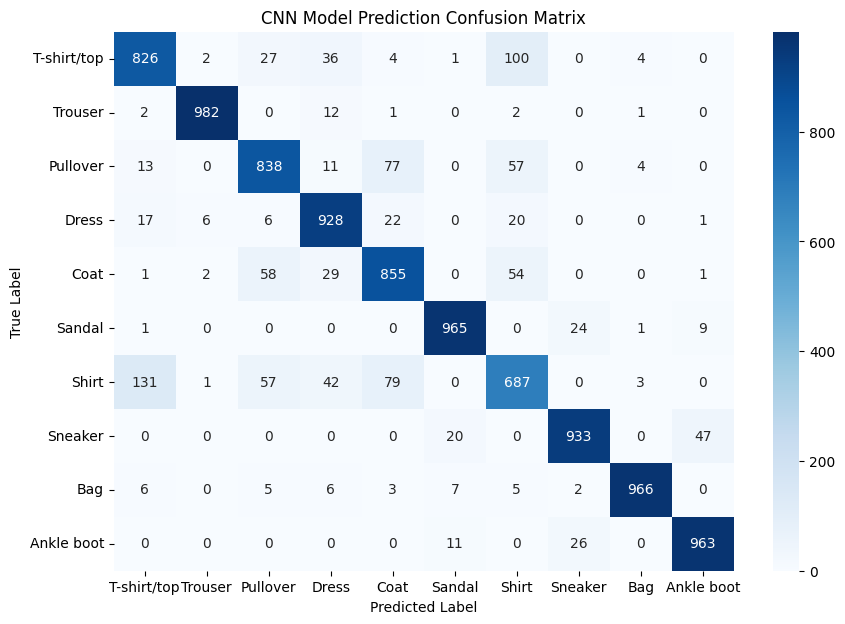

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# AI generated and taken from Deep learning assigment 
def get_predictions(model, loader, device="cpu"):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # reshape if flattened
            if inputs.ndim == 2 and inputs.shape[1] == 784:
                inputs = inputs.view(-1, 1, 28, 28)
            
            outputs = model(inputs)  # logits
            _, preds = torch.max(outputs, 1)  # class indices

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_labels), np.array(all_preds)


class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
# Testing the value with the testset 
y_true, y_pred_classes = get_predictions(model, test_loader)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("CNN Model Prediction Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [40]:
print(classification_report(y_test, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.83      0.83      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.84      0.84      1000
       Dress       0.87      0.93      0.90      1000
        Coat       0.82      0.85      0.84      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.74      0.69      0.71      1000
     Sneaker       0.95      0.93      0.94      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.94      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [41]:
# This function is AI generated 
def show_random_predictions(test_loader, all_preds, all_labels, class_names, num_images=10):
    indices = np.random.choice(len(all_labels), num_images, replace=False)

    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(indices):
        # Get image and true label from dataset
        image, label = test_loader.dataset[idx]
        predicted_label = all_preds[idx]

        plt.subplot(2, 5, i + 1)
        
        # If image is flattened, reshape to 28x28
        if image.ndim == 1:
            image = image.view(28, 28)
        elif image.ndim == 3:  # (1, 28, 28)
            image = image.squeeze(0)

        plt.imshow(image.cpu().numpy(), cmap="gray")
        plt.axis("off")

        # Green title if correct, red if wrong
        color = "green" if predicted_label == label else "red"
        plt.title(f"True: {class_names[label]}\nPred: {class_names[predicted_label]}",
                  fontsize=10, color=color)

    plt.tight_layout()
    plt.show()


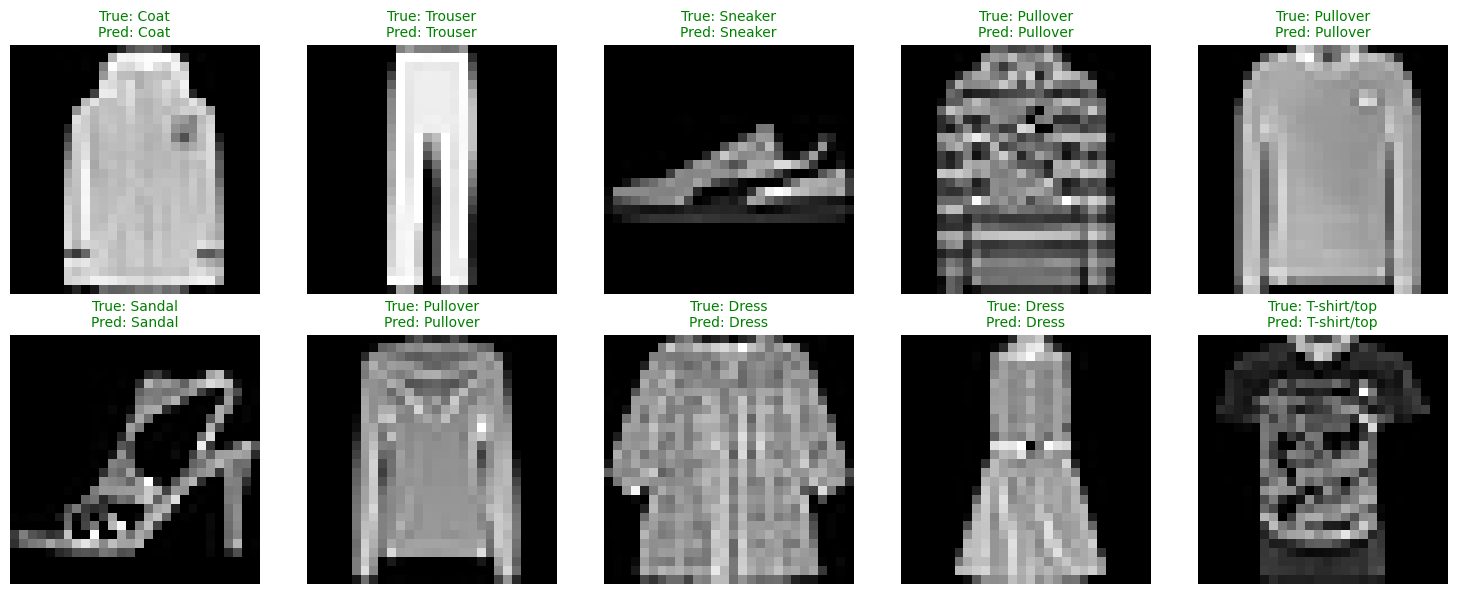

In [42]:
show_random_predictions(test_loader, y_pred_classes, y_true, class_names, num_images=10)


## The calibration 
The part follows a method called Temperature Scaling : https://docs.aws.amazon.com/prescriptive-guidance/latest/ml-quantifying-uncertainty/temp-scaling.html Before applying softmax, we introduce a scaling factor called the temperature T. This temperature adjusts how spread out or sharp the softmax probabilities are: 
1. A higher T makes the probabilities more calmer (lower confidence).
2. A lower T makes the probabilities more extrem (higher confidence).


- TODO: Still working on this section and the code here is mostly AI generated 

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ModelWithTemperature(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.temperature = nn.Parameter(torch.ones(1) * 1.0)  # initial T=1.0

    def forward(self, input):
        logits = self.model(input)
        return self.temperature_scale(logits)

    def temperature_scale(self, logits):
    
        return logits / self.temperature

    def set_temperature(self, valid_loader):
        """Tune the temperature using validation data."""
        self.eval()
        nll_criterion = nn.CrossEntropyLoss()

        logits_list, labels_list = [], []
        with torch.no_grad():
            for inputs, labels in valid_loader:
                # reshape if flattened
                if inputs.ndim == 2:  # shape [batch, 784]
                    inputs = inputs.view(-1, 1, 28, 28)  # MNIST/Fashion-MNIST

                logits = self.model(inputs)
                logits_list.append(logits)
                labels_list.append(labels)

        logits = torch.cat(logits_list)
        labels = torch.cat(labels_list)

        optimizer = torch.optim.LBFGS([self.temperature], lr=0.01, max_iter=50)

        def eval_closure():
            optimizer.zero_grad()
            loss = nll_criterion(self.temperature_scale(logits), labels)
            loss.backward()
            return loss

        optimizer.step(eval_closure)
        # print(inputs.shape)
        return self


In [44]:
# After training your CNN model
model_with_temp = ModelWithTemperature(model)

# Calibrate temperature on validation set
model_with_temp.set_temperature(val_loader)

all_probs, all_labels = [], []

model_with_temp.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        # reshape if flattened
        if inputs.ndim == 2:
            inputs = inputs.view(-1, 1, 28, 28)

        logits = model_with_temp(inputs)
        probs = F.softmax(logits, dim=1)

        all_probs.append(probs.numpy())
        all_labels.append(labels.numpy())
        
        print("Logits shape:", logits.shape)
        print("Probs shape:", probs.shape)
        print("First row of probs:", probs[0])

all_probs = np.vstack(all_probs)    # shape [N, num_classes]
all_labels = np.hstack(all_labels)
        

Logits shape: torch.Size([1500, 10])
Probs shape: torch.Size([1500, 10])
First row of probs: tensor([9.4875e-01, 5.0540e-10, 9.2609e-06, 9.0728e-06, 3.1966e-05, 2.4761e-16,
        5.1200e-02, 9.8256e-16, 1.0805e-06, 3.2048e-14])
Logits shape: torch.Size([1500, 10])
Probs shape: torch.Size([1500, 10])
First row of probs: tensor([9.7232e-01, 1.5425e-08, 6.3949e-06, 9.9293e-05, 5.6240e-05, 5.0886e-19,
        2.7518e-02, 1.7286e-19, 1.0479e-09, 6.6430e-15])
Logits shape: torch.Size([1500, 10])
Probs shape: torch.Size([1500, 10])
First row of probs: tensor([2.2378e-01, 3.2032e-06, 6.1296e-02, 2.7004e-02, 3.8942e-03, 7.4224e-15,
        6.7189e-01, 6.1794e-16, 1.2133e-02, 6.2504e-09])
Logits shape: torch.Size([1500, 10])
Probs shape: torch.Size([1500, 10])
First row of probs: tensor([9.0176e-07, 9.3155e-07, 2.8431e-07, 1.0000e+00, 1.6717e-07, 2.8228e-15,
        2.1825e-06, 2.7530e-18, 5.4800e-10, 1.3984e-14])
Logits shape: torch.Size([1500, 10])
Probs shape: torch.Size([1500, 10])
First r

In [45]:
pred_labels = probs.argmax(dim=1)         # predicted class
confidences = probs.max(dim=1).values     # confidence score
print("predicted class",pred_labels)
print("confidence score", confidences)

predicted class tensor([9, 4, 5, 1, 2, 4, 9, 0, 1, 2, 8, 7, 6, 1, 2, 0, 8, 9, 1, 7, 0, 1, 2, 1,
        3, 4, 7, 8, 8, 9, 6, 1, 8, 5, 6, 9, 9, 2, 2, 6, 5, 7, 7, 9, 9, 7, 7, 3,
        9, 0, 7, 6, 1, 5, 5, 8, 5, 7, 5, 2, 5, 5, 5, 1, 5, 9, 4, 8, 7, 6, 3, 6,
        6, 6, 7, 4, 2, 1, 2, 8, 8, 1, 5, 9, 2, 1, 4, 0, 6, 8, 2, 3, 7, 5, 0, 5,
        1, 5, 8, 9, 2, 6, 1, 0, 9, 6, 2, 2, 4, 4, 3, 1, 7, 9, 4, 6, 4, 2, 7, 1,
        1, 2, 7, 4, 6, 8, 7, 2, 2, 6, 0, 7, 5, 0, 0, 2, 2, 5, 8, 6, 0, 8, 1, 6,
        9, 2, 1, 4, 3, 6, 7, 2, 8, 6, 6, 4, 1, 1, 7, 5, 6, 4, 9, 9, 0, 9, 8, 5,
        6, 6, 6, 1, 1, 1, 8, 1, 4, 8, 9, 7, 2, 9, 8, 2, 1, 8, 6, 0, 6, 8, 3, 8,
        5, 5, 8, 7, 8, 2, 8, 6, 5, 1, 5, 4, 3, 4, 8, 3, 6, 1, 8, 2, 7, 4, 7, 8,
        0, 8, 6, 4, 3, 6, 2, 1, 4, 1, 5, 3, 2, 2, 5, 2, 9, 3, 7, 9, 2, 2, 4, 6,
        0, 2, 7, 6, 1, 4, 7, 5, 8, 8, 2, 3, 0, 6, 8, 5, 0, 3, 5, 0, 3, 1, 9, 5,
        5, 2, 7, 9, 9, 6, 9, 2, 0, 3, 6, 2, 1, 9, 8, 1, 5, 4, 3, 2, 2, 5, 7, 3,
        4, 5, 9, 2, 7, 1

In [46]:
from sklearn.metrics import log_loss
import numpy as np

# Negative Log Likelihood
nll = log_loss(all_labels, all_probs)

# Multiclass Brier score (manual calculation)
one_hot = np.zeros_like(all_probs)
one_hot[np.arange(len(all_labels)), all_labels] = 1
brier = np.mean(np.sum((all_probs - one_hot) ** 2, axis=1))

print("NLL (cross-entropy):", nll)
print("Brier score (multiclass):", brier)


NLL (cross-entropy): 0.33151206839912106
Brier score (multiclass): 0.15802175


ECE: 0.03094458580315114


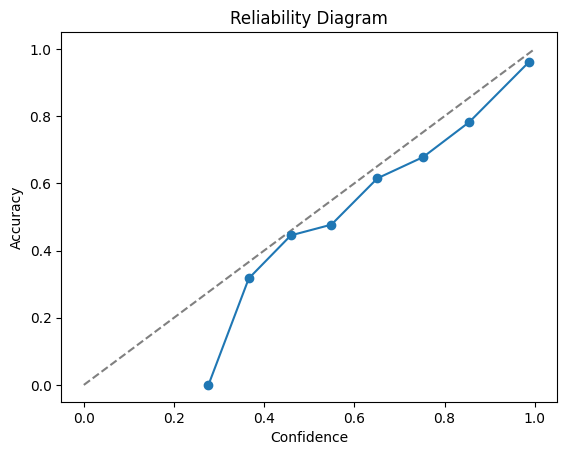

In [47]:
import matplotlib.pyplot as plt

def reliability_diagram(probs, labels, n_bins=10):
    confidences = probs.max(axis=1)
    predictions = probs.argmax(axis=1)
    accuracies = (predictions == labels)

    bins = np.linspace(0.0, 1.0, n_bins+1)
    binids = np.digitize(confidences, bins) - 1

    bin_accs, bin_confs = [], []
    for i in range(n_bins):
        bin_conf = confidences[binids == i]
        bin_acc  = accuracies[binids == i]
        if len(bin_conf) > 0:
            bin_confs.append(bin_conf.mean())
            bin_accs.append(bin_acc.mean())

    plt.plot([0,1],[0,1], linestyle="--", color="gray")
    plt.plot(bin_confs, bin_accs, marker="o")
    plt.xlabel("Confidence")
    plt.ylabel("Accuracy")
    plt.title("Reliability Diagram")
    plt.show()

def expected_calibration_error(probs, labels, n_bins=10):
    confidences = probs.max(axis=1)
    predictions = probs.argmax(axis=1)
    accuracies = (predictions == labels)

    bins = np.linspace(0.0, 1.0, n_bins+1)
    binids = np.digitize(confidences, bins) - 1

    ece = 0.0
    for i in range(n_bins):
        bin_conf = confidences[binids == i]
        bin_acc  = accuracies[binids == i]
        if len(bin_conf) > 0:
            ece += abs(bin_acc.mean() - bin_conf.mean()) * len(bin_conf) / len(confidences)
    return ece

print("ECE:", expected_calibration_error(all_probs, all_labels))
reliability_diagram(all_probs, all_labels)



Potential reasons for the discrepancy in the results:
1. Optimiser was set to 1. step, but it is difficult to converge after 1 step 

--> Add a print statement of temperature value 



In [48]:
# Small change for optimiser 
class ModelWithTemperature(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.temperature = nn.Parameter(torch.ones(1) * 1.0)

    def forward(self, x):
        logits = self.model(x)
        return self.temperature_scale(logits)

    def temperature_scale(self, logits):
        return logits / self.temperature

    def set_temperature(self, valid_loader, device="cpu", max_iter=200):
        self.to(device)
        self.eval()
        nll_criterion = nn.CrossEntropyLoss()

        logits_list, labels_list = [], []
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                if inputs.ndim == 2: 
                    inputs = inputs.view(-1, 1, 28, 28)
                logits = self.model(inputs)
                logits_list.append(logits)
                labels_list.append(labels)

        logits = torch.cat(logits_list)
        labels = torch.cat(labels_list)

        optimizer = torch.optim.LBFGS([self.temperature], lr=0.01, max_iter=max_iter)

        def eval_closure():
            optimizer.zero_grad()
            loss = nll_criterion(self.temperature_scale(logits), labels)
            loss.backward()
            return loss

        for _ in range(10):
            optimizer.step(eval_closure)

        print(f"Optimal Temperature: {self.temperature.item():.4f}")
        return self


device = "cpu"
model_with_temp = ModelWithTemperature(model).to(device)
model_with_temp.set_temperature(val_loader, device=device)


Optimal Temperature: 1.7027


ModelWithTemperature(
  (model): CNN(
    (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fc): Linear(in_features=1568, out_features=10, bias=True)
  )
)

# Calibration - Ioanna 

We decided to use for calibation the method temperature scaling. Temperature scaling is a single-parameter version of Platt Logistic Scaling (Platt 1999).

https://docs.aws.amazon.com/prescriptive-guidance/latest/ml-quantifying-uncertainty/temp-scaling.html

https://arxiv.org/abs/1706.04599

Needs to be added after training. We need to min Negative Log Likelihood on the validation logits and find a positive scalar T, called Temperature, and use it later for the rest of the produced logits (test). The accuracy of the model will not change, we are just adjusting the probabilities.

borrowed part of the code from: 
https://github.com/gpleiss/temperature_scaling/blob/master/temperature_scaling.py 

In [49]:
import torch
from torch import nn, optim
from torch.nn import functional as F

# Temperature scaling 
class ModelWithTemperature(nn.Module):
    """
    Pass raw logits (not softmax probs) through it
    """
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.temperature = nn.Parameter(torch.ones(1) * 1.5)

    def forward(self, x):
        logits = self.model(x)
        return self.temperature_scale(logits)

    def temperature_scale(self, logits):
        T = self.temperature.unsqueeze(1).expand(logits.size(0), logits.size(1))
        return logits / T

    def set_temperature(self, valid_loader, device="cpu"):
        """Fit temperature on validation set using Neg Log Likelihood Loss."""
        self.to(device)
        nll_criterion = nn.CrossEntropyLoss().to(device)

        # Get logits & labels
        logits_list, labels_list = [], []
        model_training = self.training
        self.eval()
        with torch.no_grad():
            for x, y in valid_loader:
                x, y = x.to(device), y.to(device)
                if x.ndim == 2 and x.shape[1] == 784:
                    x = x.view(-1, 1, 28, 28)
                logits_list.append(self.model(x))
                labels_list.append(y)
        logits = torch.cat(logits_list).to(device)
        labels = torch.cat(labels_list).to(device)

        # Optimise T with respect to NLL 
        optimiser = optim.LBFGS([self.temperature], lr=0.01, max_iter=200)
        def nll_loss():
            optimiser.zero_grad()
            loss = nll_criterion(self.temperature_scale(logits), labels)
            loss.backward()
            return loss
        optimiser.step(nll_loss)
        print(f"Optimal temperature: {self.temperature.item():.2f}")
        self.train(model_training)
        return self


In [50]:
# Negative Log-Likelihood (NLL)
def compute_nll(logits, labels):
    return nn.CrossEntropyLoss()(logits, labels).item()

# Expected Calibration Error (ECE)
def compute_ece(logits, labels, n_bins=15):
    probs = F.softmax(logits, dim=1)
    conf, pred = probs.max(dim=1)
    acc = pred.eq(labels)
    bin_boundaries = torch.linspace(0, 1, n_bins + 1)
    ece = torch.zeros(1)
    for i in range(n_bins):
        mask = (conf > bin_boundaries[i]) & (conf <= bin_boundaries[i + 1])
        if mask.any():
            prop = mask.float().mean()
            ece = ece + torch.abs(conf[mask].mean() - acc[mask].float().mean()) * prop
    return ece.item()


In [51]:
# Get probabilities for validation and testing set and save them as csvs
def get_probs_save(model_with_temp, data_loader, device, prefix="cnn", filename=None):
    
    model_with_temp.eval()
    all_logits, all_labels = [], []

    with torch.no_grad():
        for x, y in data_loader:
            x, y = x.to(device), y.to(device)
            if x.ndim == 2 and x.shape[1] == 784:
                x = x.view(-1, 1, 28, 28)
            logits = model_with_temp.model(x)           
            scaled_logits = model_with_temp.temperature_scale(logits)
            all_logits.append(scaled_logits.cpu())
            all_labels.append(y.cpu())

    logits = torch.cat(all_logits)
    labels = torch.cat(all_labels)
    probs = F.softmax(logits, dim=1).numpy()

    ids = np.arange(len(labels))
    df = pd.DataFrame(probs, columns=[f"{prefix}_class_{i}" for i in range(probs.shape[1])])
    df.insert(0, "id", ids)
    df["true_label"] = labels.numpy()

    if filename:
        df.to_csv(filename, index=False)
        print(f"Saved {filename} ({len(df)} rows)")
    return df


In [52]:
# Calibrated predictions for the combined set and test set
device = "cuda" if torch.cuda.is_available() else "cpu"
# Find best temperature using the COMBINED data
scaled_model = ModelWithTemperature(model).to(device)
scaled_model.set_temperature(comb_train_loader, device=device)

cnn_comb_test_df = get_probs_save(
    scaled_model, comb_test_loader, device,
    prefix="cnn", filename="cnn_comb_test_calibrated_predictions.csv")
cnn_test_df = get_probs_save(
    scaled_model, test_loader, device,
    prefix="cnn", filename="cnn_test_calibrated_predictions.csv")



Optimal temperature: 1.69
Saved cnn_comb_test_calibrated_predictions.csv (4800 rows)
Saved cnn_test_calibrated_predictions.csv (10000 rows)


In [53]:
# Get raw and calibrated logits 
def collect_logits(model, scaled_model, loader, device):
    raw_logits, cal_logits, labels = [], [], []
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            if x.ndim == 2 and x.shape[1] == 784:
                x = x.view(-1, 1, 28, 28)
            out_raw = model(x)                       
            out_cal = scaled_model.temperature_scale(out_raw)
            raw_logits.append(out_raw.cpu())
            cal_logits.append(out_cal.cpu())
            labels.append(y.cpu())
    return torch.cat(raw_logits), torch.cat(cal_logits), torch.cat(labels)

logits_raw, logits_cal, labels_test = collect_logits(model, scaled_model, test_loader, device)

# Accuracy shouldn't change
acc = (logits_raw.argmax(1) == labels_test).float().mean().item() * 100
print(f"Test Accuracy: {acc:.2f}%")

# NLL & ECE before & after calibration
print(f"NLL  before: {compute_nll(logits_raw, labels_test):.4f}  "
      f"after: {compute_nll(logits_cal, labels_test):.4f}")
print(f"ECE  before: {compute_ece(logits_raw, labels_test):.4f}  "
      f"after: {compute_ece(logits_cal, labels_test):.4f}")


Test Accuracy: 89.43%
NLL  before: 0.3574  after: 0.3066
ECE  before: 0.0422  after: 0.0114


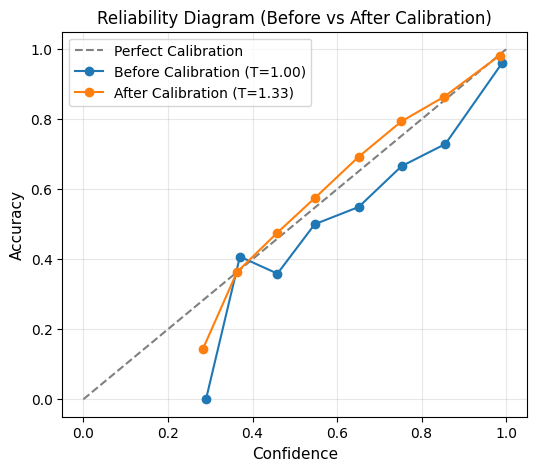

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

def reliability_diagram(logits, labels, n_bins=10):
    probs = F.softmax(logits, dim=1)
    conf, pred = probs.max(dim=1)
    acc = pred.eq(labels)

    bins = torch.linspace(0, 1, n_bins + 1)
    bin_accs, bin_confs = [], []

    for i in range(n_bins):
        mask = (conf > bins[i]) & (conf <= bins[i+1])
        if mask.any():
            bin_accs.append(acc[mask].float().mean().item())
            bin_confs.append(conf[mask].mean().item())

    return np.array(bin_confs), np.array(bin_accs)

# Compute bin stats (before vs after calibration)
bin_confs_raw, bin_accs_raw = reliability_diagram(logits_raw, labels_test)
bin_confs_cal, bin_accs_cal = reliability_diagram(logits_cal, labels_test)

# Plot 
plt.figure(figsize=(6, 5))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfect Calibration")

plt.plot(bin_confs_raw, bin_accs_raw, marker="o", label="Before Calibration (T=1.00)", color="tab:blue")
plt.plot(bin_confs_cal, bin_accs_cal, marker="o", label="After Calibration (T=1.33)", color="tab:orange")

plt.xlabel("Confidence", fontsize=11)
plt.ylabel("Accuracy", fontsize=11)
plt.title("Reliability Diagram (Before vs After Calibration)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Accuracy remained the same as expected. Both metrices reduced showing that the model is more reliable. Because 𝑇 = 1.32 > 1
the model’s logits must be scaled down so that its probability estimates are less extreme and more aligned with reality


The graph has on x-axis the predicted confidence and on the y-axis the actual accuracy. The blue line is below the perfect clibration line, acc < conf showing overconfidence. After calibrating the line is closer to the gray line which shows that is better calibrated. 